In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2025 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# High/Low Analysis

This uses MetPy's `find_peaks` function to automatically identify locations of high and low
centers, and then plots them on a map.

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

from metpy.calc import find_peaks
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, scattertext
from metpy.units import units

Start by loading some data from our sample GFS model dataset. Pull out the geopotential
heights field for the 850 hPa layer, as well as grab the projection metadata.

In [4]:
data = xr.open_dataset(get_test_data('GFS_test.nc', as_file_obj=False)).metpy.parse_cf()
mslp = data.Geopotential_height_isobaric.metpy.sel(vertical=850 * units.hPa).squeeze()
dataproj = mslp.metpy.cartopy_crs


Here we use `find_peaks` to find the locations of the highs and then the lows

In [5]:
h_y, h_x = find_peaks(mslp.values)
l_y, l_x = find_peaks(mslp.values, maxima=False)

Plot the analyzed locations on top of the contours of height on a map

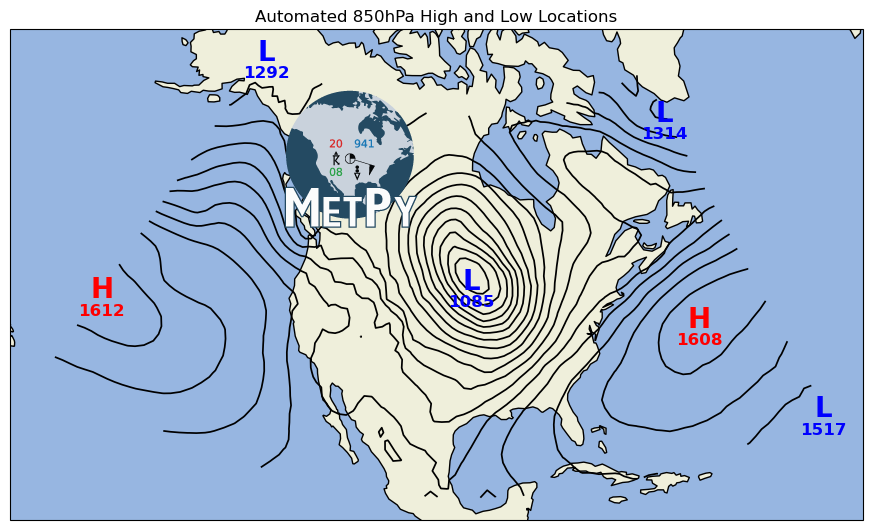

In [6]:
fig = plt.figure(figsize=(11., 8.))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-95))
ax.contour(mslp.metpy.x, mslp.metpy.y, mslp, range(0, 2000, 30),
           colors='k', linewidths=1.25, linestyles='solid', transform=dataproj)

# Using scattertext() plot the high centers using a red 'H' and put the height value
# below the 'H' using a smaller font.
scattertext(ax, mslp.metpy.x[h_x], mslp.metpy.y[h_y], 'H', size=20, color='red',
            fontweight='bold', transform=dataproj)
scattertext(ax, mslp.metpy.x[h_x], mslp.metpy.y[h_y], mslp.values[h_y, h_x], formatter='.0f',
            size=12, color='red', loc=(0, -15), fontweight='bold', transform=dataproj)

# Now do the same for the lows using a blue 'L'
scattertext(ax, mslp.metpy.x[l_x], mslp.metpy.y[l_y], 'L', size=20, color='blue',
            fontweight='bold', transform=dataproj)
scattertext(ax, mslp.metpy.x[l_x], mslp.metpy.y[l_y], mslp.values[l_y, l_x], formatter='.0f',
            size=12, color='blue', loc=(0, -15), fontweight='bold', transform=dataproj)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

ax.set_title('Automated 850hPa High and Low Locations')
add_metpy_logo(fig, 275, 295, size='large')
plt.show()